# Loss curves
## Comparison of different trainings via train & val loss

In [12]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep

plt.style.use(hep.cms.style.ROOT)

In [13]:
model_names = ['nominal', 'adversarial']

In [14]:
models_str = model_names[0] + '_' + model_names[1]

In [15]:
tagger = 'DF_Run2'

In [16]:
dirz = [f'/eos/user/h/heschone/DeepJet/Train_{tagger}/{model_name}/' \
        for model_name in model_names]
save_dir = f'/eos/user/h/heschone/DeepJet/Plots/'

In [17]:
dirz

['/eos/user/h/heschone/DeepJet/Train_DF_Run2/nominal/',
 '/eos/user/h/heschone/DeepJet/Train_DF_Run2/adversarial/']

In [18]:
colorcode = ['darkblue', 'royalblue', 'saddlebrown', 'orange', 'forestgreen', 'limegreen', 'purple', 'magenta']

In [19]:
paths = {
    'nominal' : dirz[0] + f'loss_trainval.npy',
    'adversarial' : dirz[1] + f'loss_trainval.npy',
    }

In [20]:
leg_text = {
    'nominal' : 'nominal, bsize=4000',
    'adversarial' : r'adversarial ($\epsilon=0.01$, bsize=4000)',
    }

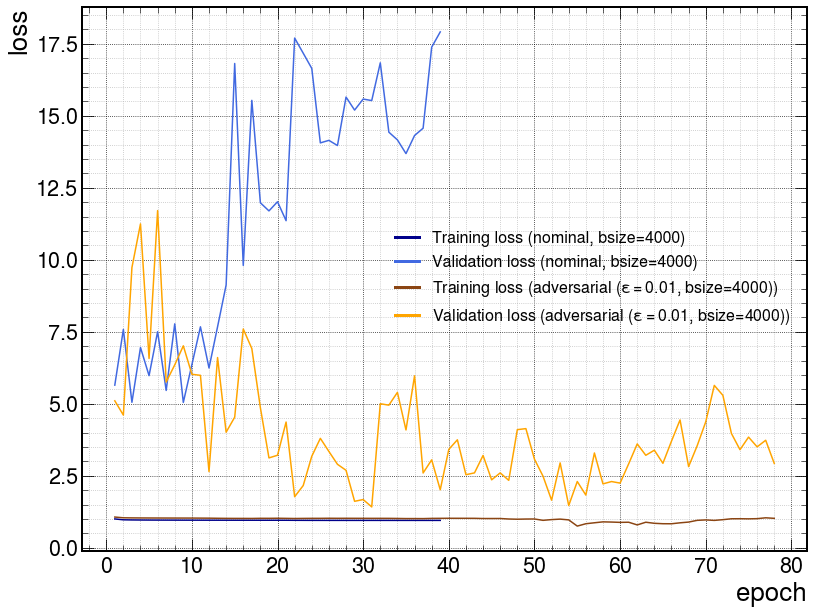

In [21]:
plt.figure(1,figsize=[13,10])
plt.grid(which='minor', alpha=0.85)
plt.grid(which='major', alpha=0.95, color='black')
for p,key in enumerate(paths):
    train_val_loss = np.load(paths[key])
    n_epochs = len(train_val_loss[0])
    epoch_axis = np.arange(1,n_epochs+1)
    # plot training loss
    plt.plot(epoch_axis, train_val_loss[0], color=colorcode[p*2], label=f'Training loss ({leg_text[key]})')
    # plot validation loss
    plt.plot(epoch_axis, train_val_loss[1], color=colorcode[p*2+1], label=f'Validation loss ({leg_text[key]})')
plt.xlabel('epoch')
plt.ylabel('loss')
leg = plt.legend(fontsize=16)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
plt.savefig('train_val_loss_' + tagger + '_' + models_str + '.pdf', bbox_inches='tight')
plt.savefig(save_dir + 'train_val_loss_' + tagger + '_' + models_str + '.pdf', bbox_inches='tight')

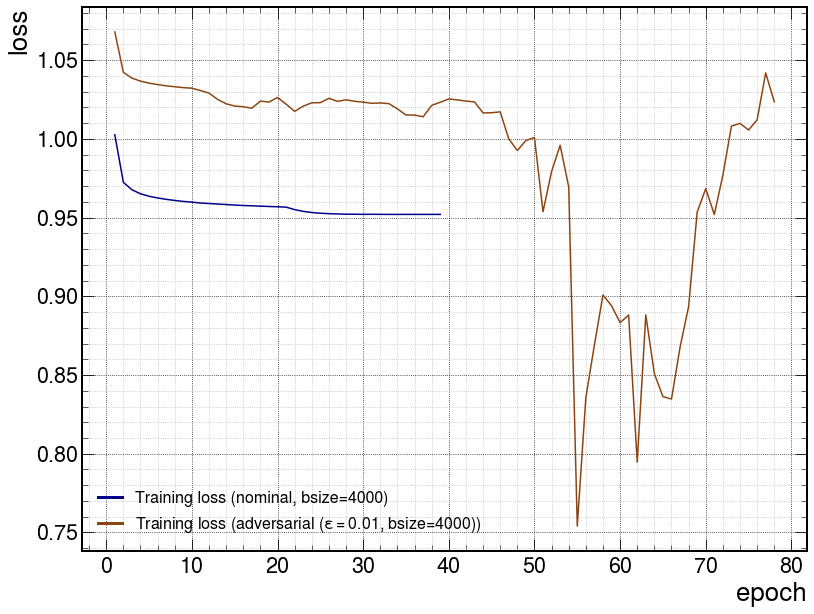

In [22]:
plt.figure(1,figsize=[13,10])
plt.grid(which='minor', alpha=0.85)
plt.grid(which='major', alpha=0.95, color='black')
for p,key in enumerate(paths):
    train_val_loss = np.load(paths[key])
    n_epochs = len(train_val_loss[0])
    epoch_axis = np.arange(1,n_epochs+1)
    
    plt.plot(epoch_axis, train_val_loss[0], color=colorcode[p*2], label=f'Training loss ({leg_text[key]})')
    #plt.plot(epoch_axis, train_val_loss[1], color=colorcode[p*2+1], label=f'Validation loss ({leg_text[key]})')
plt.xlabel('epoch')
plt.ylabel('loss')
leg = plt.legend(fontsize=16)
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(3.0)
plt.savefig('train_loss_' + tagger + '_' + models_str + '.pdf', bbox_inches='tight')
plt.savefig(save_dir + 'train_loss_' + tagger + '_' + models_str + '.pdf', bbox_inches='tight')